# Изучение закономерностей, определяющих успешность игр

## 1. Изучение общей информации о данных 

In [129]:
import pandas as pd # импортируем библиотеки 
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Таблица включает в себя:  
16715 строк
11 сстолбцов

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваиваетм подходящую возрастную категорию.


Задачи по предобработке данных:

* Переименовать столбцы (привести названия к нижнему регистру) 
* Отработать пропуски в столбцах `Name` и `Genre`
* Изучить и отработать пропуски в столбце `Year_of_Release`
* Изучить и отработать пропуски в столбцах `Critic_Score`, `User_Score`, `Rating`
* Изменить тип данных  в столбце `User_Score`
* Изучить дубликаты (при наличии) 

## 2. Предобработка данных

In [132]:
data.columns = data.columns.str.lower() #Приведем названия столбцов к нижнему регистру

In [134]:
data[data['name'].isna()] #Изучим пропущенные данные

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Удалим строки с пропущенными значениями в связи с малым колличеством пропусков и отсутствием ущерба общему объему данных

In [136]:
data = data.dropna(subset=['name'])
display(data['platform'].value_counts()) #Изучим различные платформы на наличие неявных дубликатов

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Заменим пропущенные значения в столбце `year_of_release` путем группировки общего массива данных по названию игр и заполнением средним значением по году выпуска

Дозаменим пропущенные значения в столбце `year_of_release` путем группировки общего массива данных по платформе игр и заполнением медианным значением по году выпуска. 

In [139]:
data['year_of_release'] = data['year_of_release'].fillna(data.groupby('name')['year_of_release'].transform('median')) #Заменим пропущенные значения в столбце year_of_release 
data['year_of_release'] = data['year_of_release'].fillna(data.groupby('platform')['year_of_release'].transform('median'))
display(data.head())
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [140]:
display(data.query('name == "Rock Band"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,2010.0,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
805,Rock Band,Wii,2009.0,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1142,Rock Band,PS3,2011.0,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T
1840,Rock Band,PS2,2004.5,Misc,0.71,0.06,0.0,0.35,82.0,6.8,T


In [141]:
data['year_of_release'] = data['year_of_release'].astype(int) #Изменим тип данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.5+ MB


Посчитаем общие продажи по всем регионам

In [142]:
data['sum_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
display(data.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


Проведем изучение значений tbd в столбце `user_score`

In [143]:
display(data.query('user_score == "tbd"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2.81
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2.42
657,Frogger's Adventures: Temple of the Frog,GBA,2003,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E,0.01
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E,0.01
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E,0.01


Чаще всего в компьютерных играх термин `tbd` используется в форме "будет определенно позднее", следовательно перенося на наши данные, играм еще не потавили оценки пользователи. Заменим такие значения на NaN

In [144]:
super_filter_score = data['user_score'] == 'tbd' 
data.loc[super_filter_score,'user_score'] = 'NaN'
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [147]:
display(data['rating'].value_counts()) #Изучим столбец rating

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [148]:
data = data.replace(('EC', 'K-A', 'RP', 'AO'), 'E') #Заменим редкие значения в столбцк rating на популярные
display(data['rating'].value_counts())

E       4005
T       2961
M       1563
E10+    1420
Name: rating, dtype: int64

In [150]:
data['user_score'] = data['user_score'].astype(float)
display(data.duplicated().sum()) # Дубликатов в данных не обнаружено 

0

**Дополнение**

На данном этапе предобработки данных оставим пропущенные значения в столбцах `Critic_Score`, `User_Score`, `Rating`, т.к. заполнение пропусков медианным, средним или нулевым значением будет необъективно и может существенно повлиять на дальнейшее исследование. 

## Исследовательский анализ данных

,name
year_of_release,
2008,1463
2009,1455
2010,1285
2007,1202
2011,1164
2006,1019
2005,948
2002,844
2003,797


<AxesSubplot:xlabel='year_of_release'>

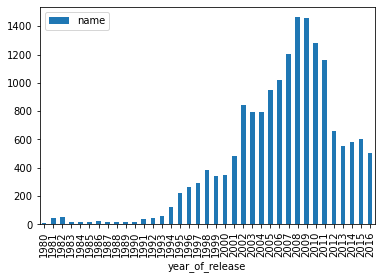

In [152]:
year_of_release = data.pivot_table(index='year_of_release', values='name', aggfunc='count') #создадим сводную таблицу по году выауска игр
display(year_of_release.sort_values(by='name', ascending=False).head(10))
year_of_release.plot.bar() #построим столбчатый график

<AxesSubplot:xlabel='year_of_release'>

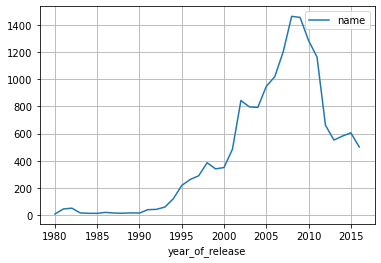

In [153]:
year_of_release.plot(grid=True) #Построил для интереса

,sum_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


<AxesSubplot:xlabel='platform'>

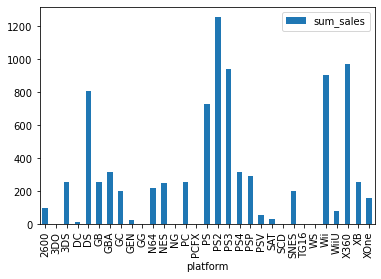

In [154]:
platform = data.pivot_table(index='platform', values='sum_sales', aggfunc='sum') #создадим сводную таблицу по платформе игр
display(platform.sort_values(by='sum_sales', ascending=False).head(10))
platform.plot.bar() #построим столбчатый график

Исследуя выпущенные по различным годам, можем сделать вывод, что пик выпуска игр выпал на период с 2005 до 2011 года, далее общее количество игр начало снижаться. 

Наиболее востребованные платформы по суммарным продажам: PS2 X360 PS3 Wii DS	

Далее изучим наиболее востребованные платформы и суммарные продажи по годам выпуска игр

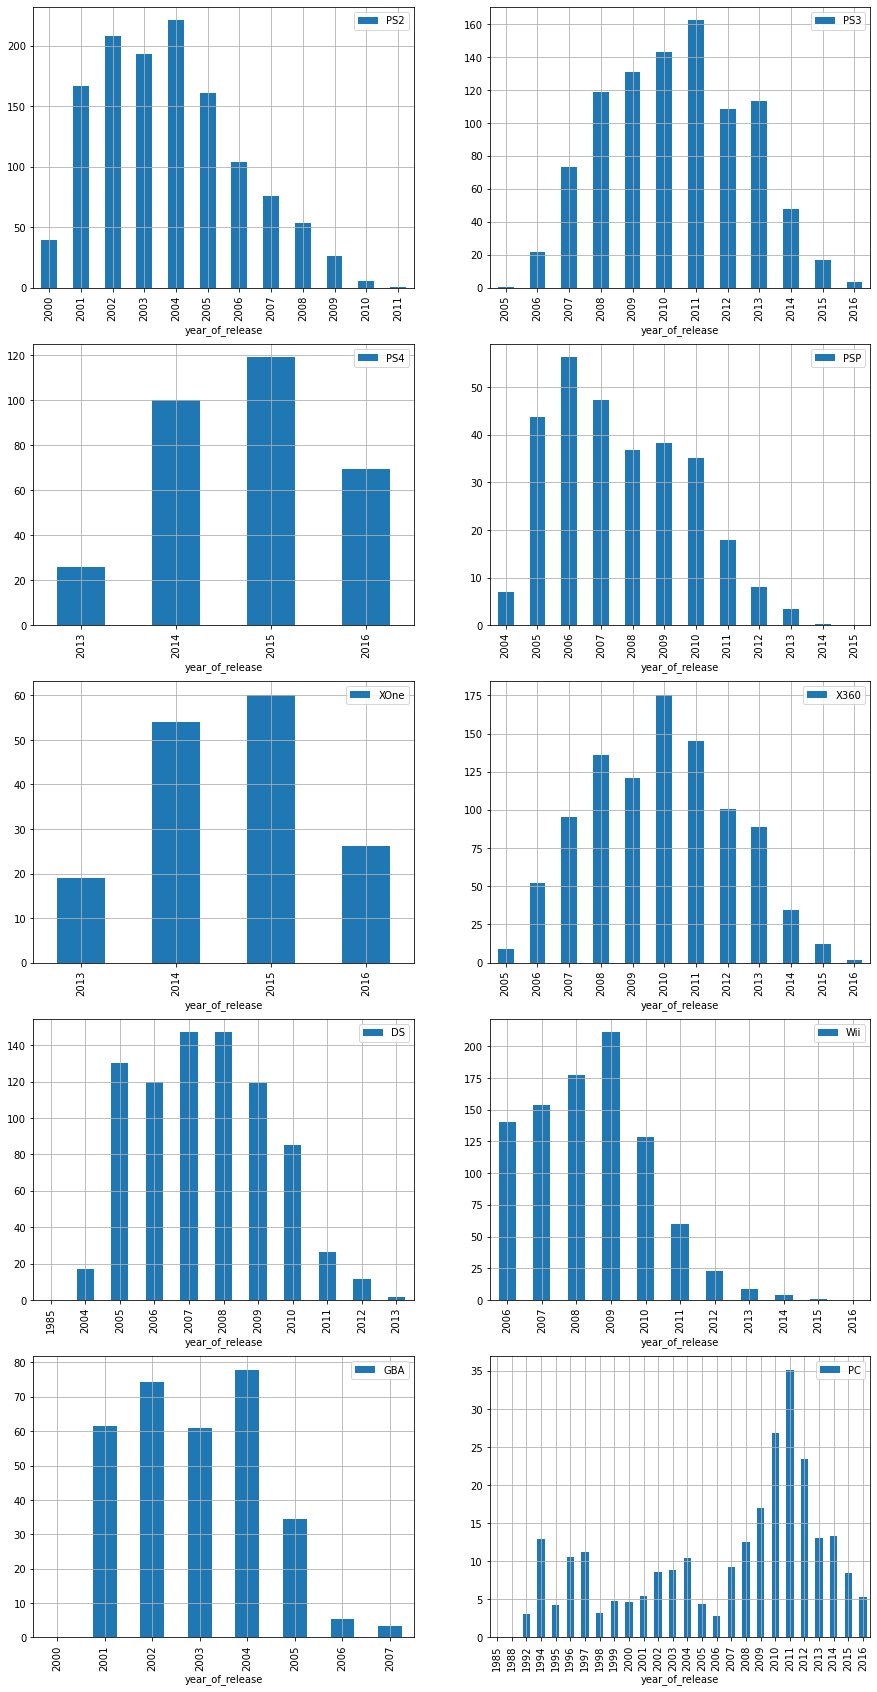

In [155]:
temp_pivot1 = data.pivot_table(index=['platform', 'year_of_release'], values='sum_sales', aggfunc='sum').reset_index()
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,30))
ax_0=0
ax_00=0
for plat_form in ['PS2', 'PS3', 'PS4', 'PSP', 'XOne', 'X360', 'DS', 'Wii', 'GBA', 'PC']:
    temp_pivot1[temp_pivot1['platform'] == plat_form].plot(x='year_of_release', y='sum_sales', kind='bar', ax=ax[ax_00, ax_0], label=plat_form, grid=True)
    ax_0 +=1
    if ax_0 > 1:
        ax_0 = 0
        ax_00 +=1
plt.show()

**Выводы:**

* В адльнейшем исследовании будем учитывать игры выпущенне после 2011 года, т.к. это год, когда наиболее популярные платформы (PS3, X360, Wii) начали резко снижать продажи, а с 2013 появились наиболее актуальные платформы
* Продажи по платформам: PS2 X360 PS3 Wii DS, занчительно снижаются к более актуальным года, что может гооврить о устаревании платформ и выходе игр под новые плафтормы, такие как PS4
* Наименьший цикл жизни из популярных консолей показала GBA, всего 1 год. Наибольший цикл жизни у PC, X360, Wii и PS3, данные платформы существуют на рынке 10 лет. Это наиболее современные и популярные платформы, следовательно и цикл жизни у них выше.  

In [156]:
data_actual = data.query('year_of_release > 2011')#создадим новую таблицу с данными только после 2004 года
display(data_actual)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


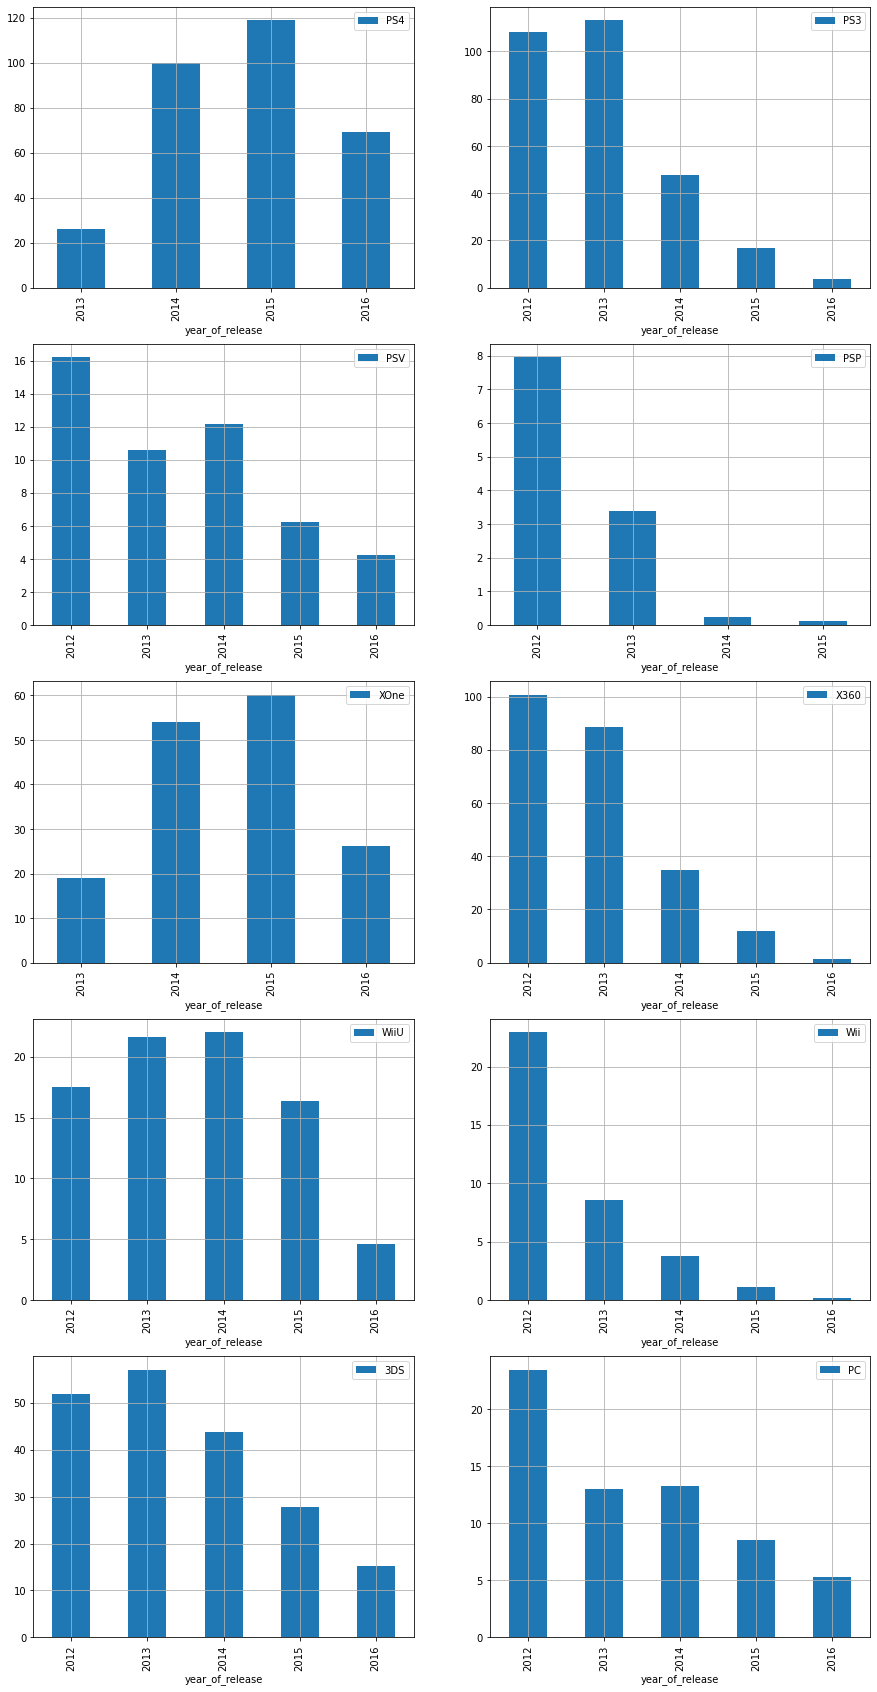

In [157]:
temp_pivot2 = data_actual.pivot_table(index=['platform', 'year_of_release'], values='sum_sales', aggfunc='sum').reset_index()
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,30))
ax_0=0
ax_00=0
for plat_form in ['PS4', 'PS3', 'PSV', 'PSP', 'XOne', 'X360', 'WiiU', 'Wii', '3DS', 'PC']:
    temp_pivot2[temp_pivot2['platform'] == plat_form].plot(x='year_of_release', y='sum_sales', kind='bar', ax=ax[ax_00, ax_0], label=plat_form, grid=True)
    ax_0 +=1
    if ax_0 > 1:
        ax_0 = 0
        ax_00 +=1
plt.show()

,sum_sales
platform,
PS4,314.14
PS3,289.71
X360,237.52
3DS,195.48
XOne,159.32
WiiU,82.19
PC,63.51
PSV,49.44
Wii,36.60


<AxesSubplot:xlabel='platform'>

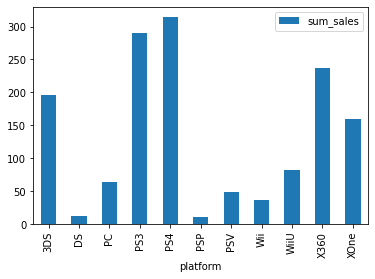

In [158]:
data_actual_sales = data_actual.pivot_table(index='platform', values='sum_sales', aggfunc='sum')
display(data_actual_sales.sort_values(by='sum_sales', ascending=False))
data_actual_sales.plot.bar()

Сравнивая суммарные продажи за весь период и актуальный можно сделать выводы: 
* Не актуальные и не современные платформы (PS2, PSP, DS, PS) резко снизили суммарные продажи и не попали в топ-10. 
* современные платформы (PS4, XOne, 3DS) приблизились по продажам к наиболее востребованным платформам.
* Потенциально прибыльные платформы: PS4, XOne, WiiU.

,sum_sales
count,11.000000
mean,132.073636
std,112.086001
min,11.690000
25%,43.020000
50%,82.190000
75%,216.500000
max,314.140000


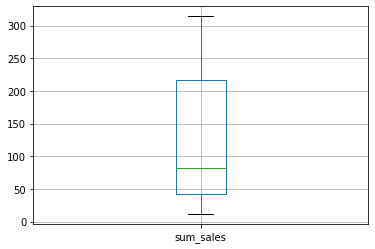

In [159]:
data_actual_sales.boxplot() # Построим ящик с усами
data_actual_sales.describe()# оценим распределение значений продаж

В данном распредлении выбросов нет. Среднее значение выше медианного (132>82). В размах «усов» попадают нормальные значения, следовательно суммарные продажи от 11 до 314 попадают в этот сегмент.

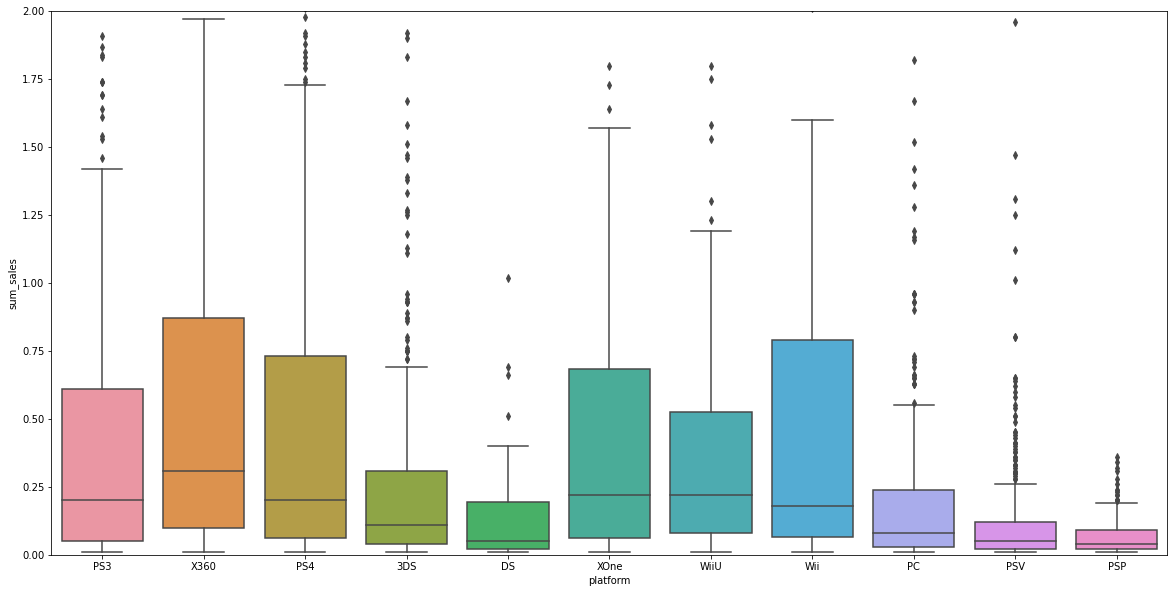

In [161]:
platform = temp_pivot3["platform"]
sum_sales = temp_pivot3["sum_sales"]
plt.figure(figsize=(20, 10))
sns.boxplot(x=platform, y=sum_sales)
plt.ylim(0, 2)
plt.show()

* Самые высокие продажи попавшие в 95% значений у X360
* Все медианные суммарные продажи лежат в пределах от 0 до 0,25, за исключением Х360, имеющем самые высокие медианные продажи.
* У всех платформ присутствуют выбросы. Выбросы - это значения, которые лежат за пределами усов (за пределами 95% значений). Они представляют продажи, превышающие высоту ящиков больше чем в три раза.
* Самые большие суммарные продажи представлены у PS3 (выброс на значении 21)
* у Большинства платформ 95% значений суммарных продаж лежат в пределах от 0 до 2

Для оценки влияния отзывов пользователей и критиков на суммарные продажи внутри платформы PS4, создадим отдельную таблицу и проведем срез данных.

In [162]:
data_actual_ps4 = data_actual[['platform', 'critic_score', 'user_score', 'sum_sales']].query('platform == "PS4"')
display(data_actual_ps4)

,platform,critic_score,user_score,sum_sales
31,PS4,NaN,NaN,14.63
42,PS4,97.0,8.3,12.62
77,PS4,82.0,4.3,8.58
87,PS4,NaN,NaN,7.98
92,PS4,83.0,5.7,7.66
...,...,...,...,...
16500,PS4,69.0,7.5,0.01
16503,PS4,NaN,NaN,0.01
16526,PS4,61.0,7.9,0.01
16530,PS4,51.0,5.5,0.01


              critic_score  user_score  sum_sales
critic_score      1.000000    0.557654   0.406568
user_score        0.557654    1.000000  -0.031957
sum_sales         0.406568   -0.031957   1.000000


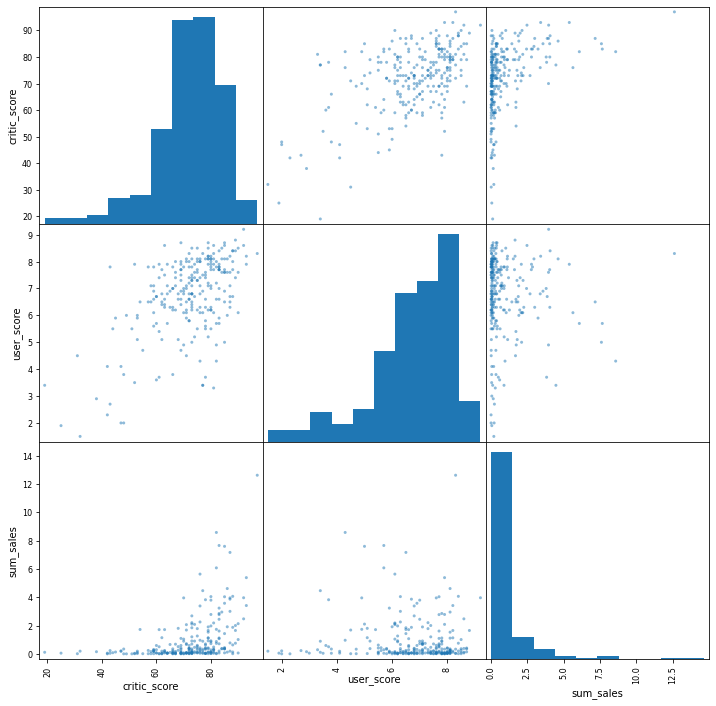

In [163]:
pd.plotting.scatter_matrix(data_actual_ps4, figsize=(12, 12))
print(data_actual_ps4.corr())

* Коррелция между отзывами пользователей и критиков есть.
* Корреляция между суммарными продажами и отзывами критиков занчительно больше, корреляции между суммарными продажами и отзывами пользователей, но явной зависимости вывести нельзя.
* можно выделить факт отсутсвия высоких продаж у игр с низкими отзывами критиков.

              critic_score  user_score  sum_sales
critic_score      1.000000    0.472462   0.416998
user_score        0.472462    1.000000  -0.068925
sum_sales         0.416998   -0.068925   1.000000


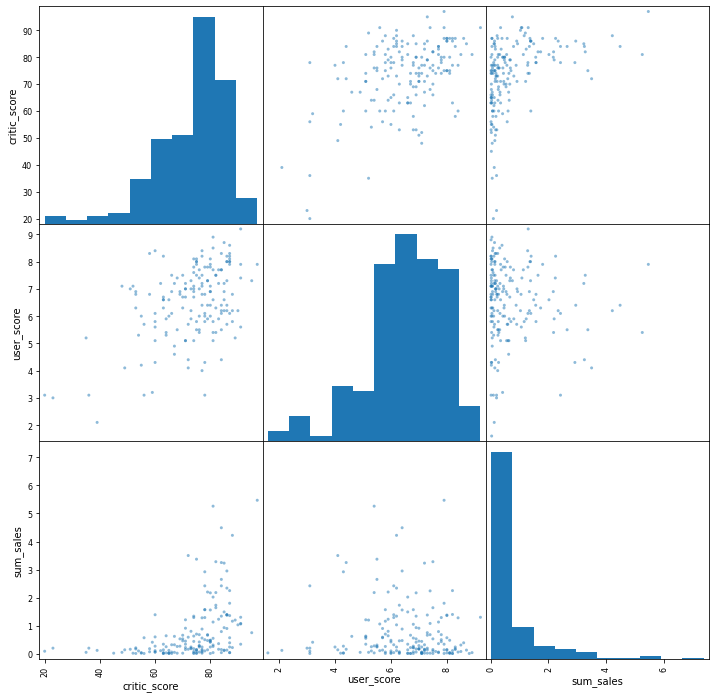

In [164]:
data_actual_xone = data_actual[['platform', 'critic_score', 'user_score', 'sum_sales']].query('platform == "XOne"')
pd.plotting.scatter_matrix(data_actual_xone, figsize=(12, 12))
print(data_actual_xone.corr())

              critic_score  user_score  sum_sales
critic_score       1.00000    0.770080   0.348380
user_score         0.77008    1.000000   0.400219
sum_sales          0.34838    0.400219   1.000000


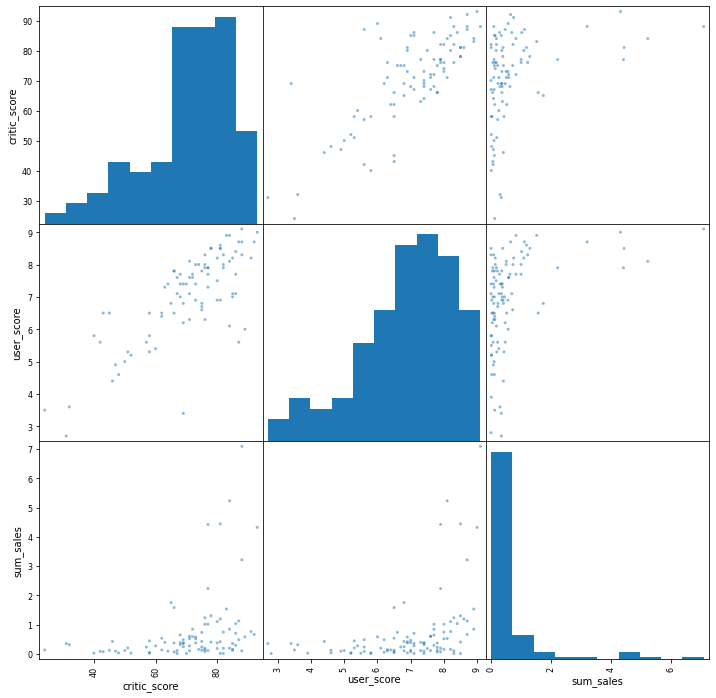

In [165]:
data_actual_wiiu = data_actual[['platform', 'critic_score', 'user_score', 'sum_sales']].query('platform == "WiiU"')
pd.plotting.scatter_matrix(data_actual_wiiu, figsize=(12, 12))
print(data_actual_wiiu.corr())

              critic_score  user_score  sum_sales
critic_score      1.000000    0.431879   0.240570
user_score        0.431879    1.000000  -0.120339
sum_sales         0.240570   -0.120339   1.000000


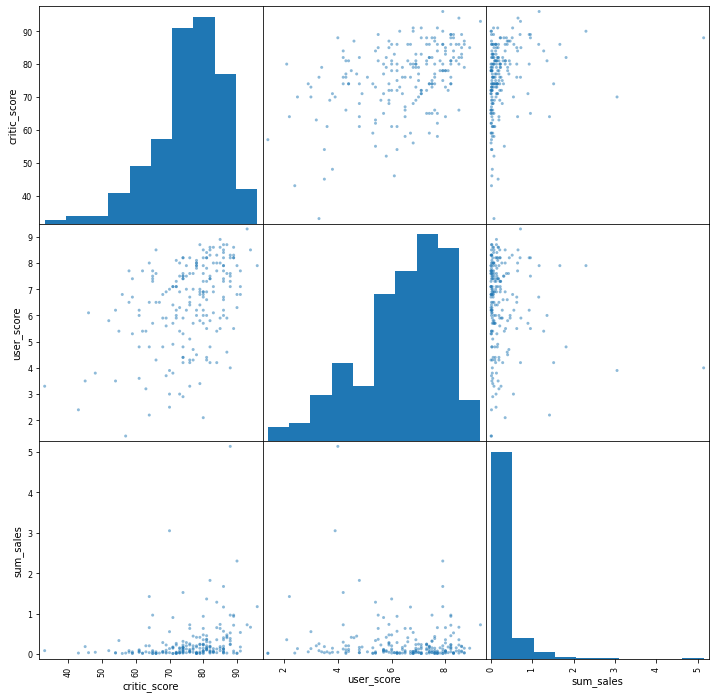

In [166]:
data_actual_pc = data_actual[['platform', 'critic_score', 'user_score', 'sum_sales']].query('platform == "PC"')
pd.plotting.scatter_matrix(data_actual_pc, figsize=(12, 12))
print(data_actual_pc.corr())

              critic_score  user_score  sum_sales
critic_score      1.000000    0.780222  -0.405997
user_score        0.780222    1.000000   0.277542
sum_sales        -0.405997    0.277542   1.000000


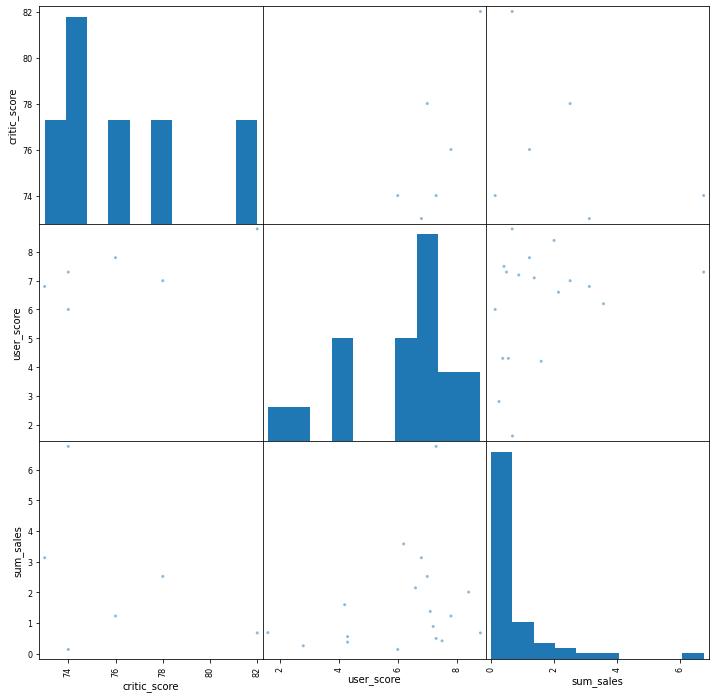

In [167]:
data_actual_wii = data_actual[['platform', 'critic_score', 'user_score', 'sum_sales']].query('platform == "Wii"')
pd.plotting.scatter_matrix(data_actual_wii, figsize=(12, 12))
print(data_actual_wii.corr())

              critic_score  user_score  sum_sales
critic_score      1.000000    0.539525   0.331371
user_score        0.539525    1.000000  -0.005043
sum_sales         0.331371   -0.005043   1.000000


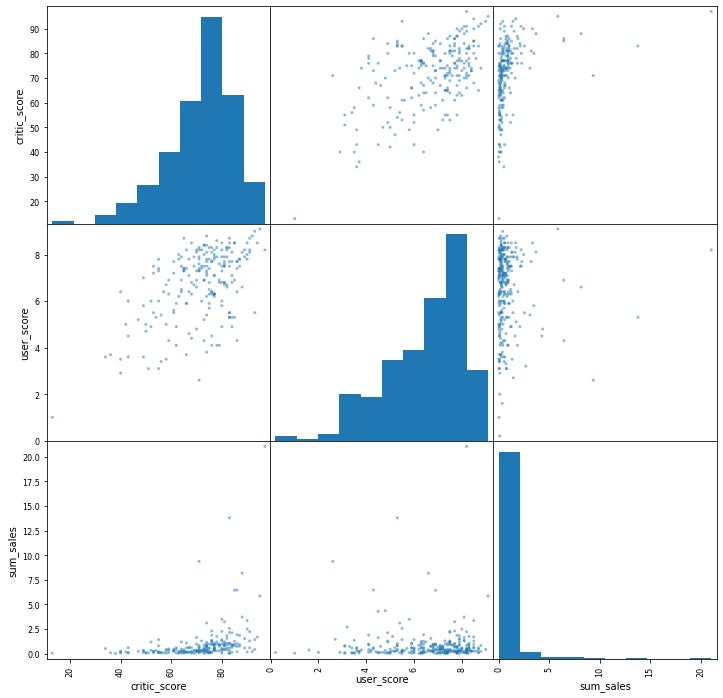

In [168]:
data_actual_ps3 = data_actual[['platform', 'critic_score', 'user_score', 'sum_sales']].query('platform == "PS3"')
pd.plotting.scatter_matrix(data_actual_ps3, figsize=(12, 12))
print(data_actual_ps3.corr())

**Выводы**

* У всех платформ наблюдается корреляция между отзывами критиков и пользователей (корреляия выше 0,4)
* У большинства платформ остуствует корреляция (приблизительно равна 0) между суммарными продажами и отзывами пользователей, следовательно данные метрики не зависят друг от друга
* У большинства платформ присутсвует корреляция между отзывами критиков и суммарными продажами, что говорит о наличии взимосвязи (чем выше оценки критиков, тем больше шанс высоких суммарных продаж) 

,sum_sales
genre,
Shooter,1.280756
Platform,0.717647
Sports,0.675634
Role-Playing,0.519059
Racing,0.461983
Misc,0.441865
Simulation,0.435926
Action,0.428828
Fighting,0.408165


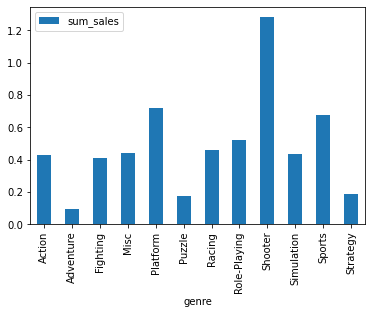

In [169]:
data_actual_genre = data_actual.pivot_table(index='genre', values='sum_sales')
data_actual_genre.plot.bar()
display(data_actual_genre.sort_values(by='sum_sales', ascending=False))

Наиболее востребованные жанры: 	
Shooter	
Platform	
Sports	

Наименее востребованные жанры: 
Strategy		
Puzzle	
Adventure	

## 4. Составление протрета пользователя каждого региона

В данном разделе расмотрим продажи по регионам (Северная Америка, Европа, Япония) 
Для этого будем формировать сводные таблицы по платформам, рейтингу и жанру

,eu_sales
platform,
PS4,141.09
PS3,107.27
X360,74.89
XOne,51.59
3DS,42.85


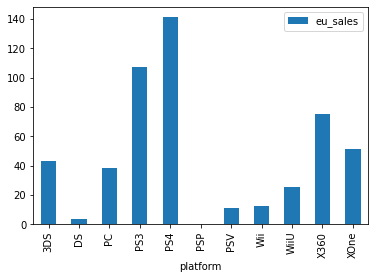

In [170]:
data_actual_eu = data_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
data_actual_eu.plot.bar()
display(data_actual_eu.sort_values(by='eu_sales', ascending=False).head())

In [171]:
data_actual_eu['sum'] = data_actual_eu['eu_sales'].sum()
data_actual_eu['part'] = data_actual_eu['eu_sales']/data_actual_eu['sum']
display(data_actual_eu.sort_values(by='part', ascending=False).head())

,eu_sales,sum,part
platform,,,
PS4,141.09,509.25,0.277054
PS3,107.27,509.25,0.210643
X360,74.89,509.25,0.147059
XOne,51.59,509.25,0.101306
3DS,42.85,509.25,0.084143


Оценивая данные за актуальные годы, наиболее востребованная платформа в Европе PS4 с долей рынка 27%. Данная платформа занимает лидирующие позиции, как самая востребованная платформа в актуальном периоде. Так же значимую долю рынка занимают PS3 21%, Х360 14%, как лидеры продаж прошлых лет.

,na_sales
platform,
X360,140.57
PS4,108.74
PS3,103.74
XOne,93.12
3DS,55.87


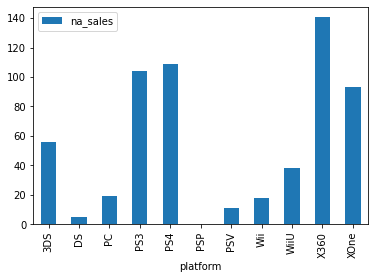

In [172]:
data_actual_na = data_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum')
data_actual_na.plot.bar()
display(data_actual_na.sort_values(by='na_sales', ascending=False).head())

In [173]:
data_actual_na['sum'] = data_actual_na['na_sales'].sum()
data_actual_na['part'] = data_actual_na['na_sales']/data_actual_na['sum']
display(data_actual_na.sort_values(by='part', ascending=False).head())

,na_sales,sum,part
platform,,,
X360,140.57,593.79,0.236734
PS4,108.74,593.79,0.183129
PS3,103.74,593.79,0.174708
XOne,93.12,593.79,0.156823
3DS,55.87,593.79,0.094091


Оценивая данные за актуальные годы, наиболее востребованная платформа в Северной Америке Х360 с долей рынка 23%. Данная платформа занимает лидирующие позиции, как одна из самых востребованная платформ в актуальном периоде и производится в Северной Америке. PS4 18% и PS3 17%  занимают на Северо Американском рынке более низкие позиции.

,jp_sales
platform,
3DS,87.82
PS3,35.29
PSV,21.11
PS4,15.96
WiiU,13.01


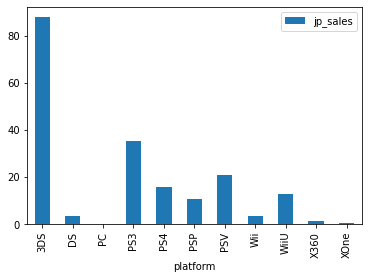

In [174]:
data_actual_jp = data_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
data_actual_jp.plot.bar()
display(data_actual_jp.sort_values(by='jp_sales', ascending=False).head())

In [175]:
data_actual_jp['sum'] = data_actual_jp['jp_sales'].sum()
data_actual_jp['part'] = data_actual_jp['jp_sales']/data_actual_jp['sum']
display(data_actual_jp.sort_values(by='part', ascending=False).head())

,jp_sales,sum,part
platform,,,
3DS,87.82,192.92,0.455215
PS3,35.29,192.92,0.182926
PSV,21.11,192.92,0.109424
PS4,15.96,192.92,0.082729
WiiU,13.01,192.92,0.067437


Оценивая данные за актуальные годы, наиболее востребованная платформа в Японии DS с долей рынка 45%. Данная платформа занимает лидирующие позиции, как отечественная платформа для Японии. Так же значимую долю рынка занимает PS3 18%, как одна из самых востребованных плафторм в мире.

,eu_sales
genre,
Shooter,0.476849
Sports,0.257799
Platform,0.251882
Racing,0.235259
Simulation,0.179630


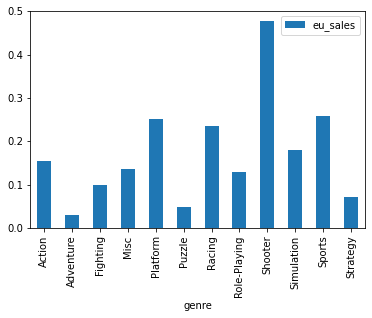

In [176]:
data_actual_eu2 = data_actual.pivot_table(index='genre', values='eu_sales')
data_actual_eu2.plot.bar()
display(data_actual_eu2.sort_values(by='eu_sales', ascending=False).head())

Оценивая данные за актуальные годы, наиболее востребованный жанр в Европе Shooter со средними суммарными продажами около 0,5. Данный жанр занимает лидирующие позиции, как самый востребованная жанр в мире. Так же значимую долю рынка занимает Sports и Platform 0,25, что так же можно сопоставить с мировой тенденцией в жанрах.

,na_sales
genre,
Shooter,0.608529
Sports,0.304216
Platform,0.298588
Misc,0.197876
Fighting,0.181560


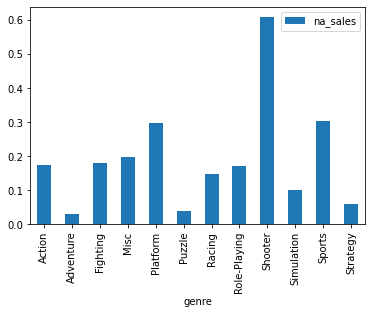

In [177]:
data_actual_na2 = data_actual.pivot_table(index='genre', values='na_sales')
data_actual_na2.plot.bar()
display(data_actual_na2.sort_values(by='na_sales', ascending=False).head())

Оценивая данные за актуальные годы, наиболее востребованный жанр в Северной Америке Shooter со средними суммарными продажами около 0,6. Данный жанр занимает лидирующие позиции, как самый востребованная жанр в мире. Так же значимую долю рынка занимает  Sports и Platform около 0,3, что так же можно сопоставить с мировой тенденцией в жанрах.

,jp_sales
genre,
Role-Playing,0.176183
Simulation,0.128519
Platform,0.101529
Fighting,0.086606
Puzzle,0.076429


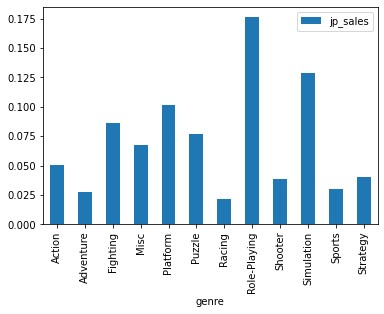

In [178]:
data_actual_jp2 = data_actual.pivot_table(index='genre', values='jp_sales')
data_actual_jp2.plot.bar()
display(data_actual_jp2.sort_values(by='jp_sales', ascending=False).head())

Оценивая данные за актуальные годы, наиболее востребованный жанр в Японии Role-Playing со средними суммарными продажами более 0,17. Так же значимую долю рынка занимает Simulation 0,12.

,jp_sales
rating,
0,0.085442
E,0.071360
T,0.063019
M,0.042147
E10+,0.026083


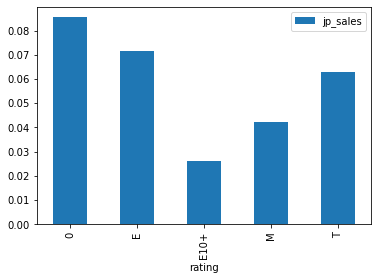

In [180]:
data_actual['rating'] = data_actual['rating'].fillna(0)
data_actual_jp3 = data_actual.pivot_table(index='rating', values='jp_sales')
data_actual_jp3.plot.bar()
display(data_actual_jp3.sort_values(by='jp_sales', ascending=False).head())

,na_sales
rating,
M,0.460577
E,0.288388
E10+,0.248439
T,0.160169
0,0.080901


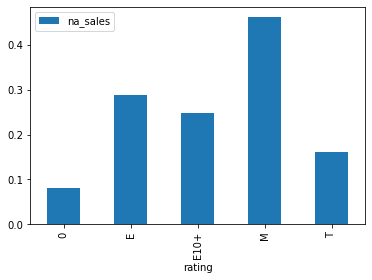

In [181]:
data_actual_na3 = data_actual.pivot_table(index='rating', values='na_sales')
data_actual_na3.plot.bar()
display(data_actual_na3.sort_values(by='na_sales', ascending=False).head())

,eu_sales
rating,
M,0.386561
E,0.284761
E10+,0.182325
T,0.128043
0,0.071652


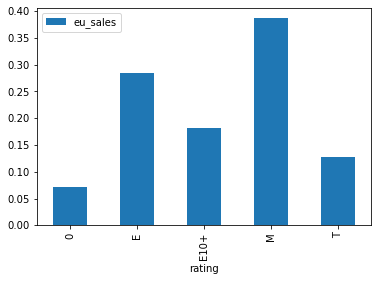

In [182]:
data_actual_eu3 = data_actual.pivot_table(index='rating', values='eu_sales')
data_actual_eu3.plot.bar()
display(data_actual_eu3.sort_values(by='eu_sales', ascending=False).head())

Оценивая данные за актуальные годы в различных регионах, наиболее востребованный рейтинги в Европпе и Северной Америке M и Е.
В Японии Е и игры без рейтинга.
Следовательно игры с рейтингом Е имеют высокий спрос в каждом из регионов.

## 5. Проверка гипотез

In [183]:
data_actual = data_actual.dropna(subset=['user_score'])#Удалим пропущенные значения

Для проверки первой гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" сравним средние двух генеральных совокупностей.

Нулевую гипотезу зададим как: Средние пользовательские рейтинги платформ Xbox One и PC равны.

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

Сформируем 2 совокупности данных по Xbox One и PC

Пороговое значение alpha = .05

In [184]:
data_actual_score_xone = data_actual.query('platform == "XOne"')
display(data_actual_score_xone.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50


In [185]:
data_actual_score_pc = data_actual.query('platform == "PC"')
display(data_actual_score_pc.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
192,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
688,Guild Wars 2,PC,2012,Action,0.96,1.07,0.0,0.27,90.0,7.9,T,2.30
959,World of Warcraft: Mists of Pandaria,PC,2012,Role-Playing,0.84,0.76,0.0,0.22,82.0,4.8,T,1.82
1095,StarCraft II: Heart of the Swarm,PC,2013,Strategy,0.83,0.66,0.0,0.18,86.0,7.9,T,1.67


In [186]:
alpha = .05 

results_score = st.ttest_ind(
data_actual_score_xone['user_score'], data_actual_score_pc['user_score'], equal_var = False) # проверим гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results_score.pvalue)

if results_score.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6206366351489678
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Так как значение p-value получилось значительно больше порогового значения, отвергаем нулевую гипотезу мы не можем, следовательно средние пользовательские рейтинги платформ Xbox One и PC в большей степени равны. 

Для проверки второй гипотезы "Средние пользовательские рейтинги жанров Action и Sports  разные" сравним средние двух генеральных совокупностей.

Нулевую гипотезу зададим как: Средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны.

Сформируем 2 совокупности данных по Action и Sports

Пороговое значение alpha = .05

In [187]:
data_actual_score_action = data_actual.query('genre == "Action"')
display(data_actual_score_action.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
127,Assassin's Creed III,PS3,2012,Action,2.64,2.52,0.16,1.12,85.0,6.9,M,6.44


In [188]:
data_actual_score_sports = data_actual.query('genre == "Sports"')
display(data_actual_score_sports.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28


In [189]:
alpha = .05 

results_score = st.ttest_ind(
data_actual_score_action['user_score'], data_actual_score_sports['user_score']) # ваш код: проверьте гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results_score.pvalue)

if results_score.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1405639632267916e-26
Отвергаем нулевую гипотезу


**Вывод**

Так как значение p-value получилось меньше порогового значения, отвергаем нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports не равны.

## 6. Выводы

Анализирую продажи игр за опредленный период необходимо было выявить определяющие успешность игры закономерности.

Сформулируем рекомендации для определения потенциально популярного продукта. 
1. Необходимо ориентироваться на современные платформы (PS4, XOne), хоть их продажи на общей выборке существено ниже продаж предшествующих им платформам, но данные платформы показывали рост продаж в последние годы. 
2. Опираясь на выбор жанра игр по различным регионам, следует делать рекламный упор на игры жанра: Shooter, Sports, Platform в Северной Америке и Европе и на жанры: Role-Playing, Simulation в Японии. 
3. Один из самых востребованных рейтингов игр - E. Вне зависимости от региона. 
4. Так же стоит обратить внимание на предпочтение отечественных платформ у представителей Сееверной Америки (X360, XOne) и Японии (DS, 3DS).
5. Важный поинт для высоких продаж игр - это отзывы критиков. У игр с наименьшим рейтингом, либо без него наименьший шанс получить высокие продажи. 